### Загружаем датасет

In [1]:
from sklearn.datasets import fetch_20newsgroups
news = fetch_20newsgroups(subset='all')

In [9]:
type(news)

sklearn.utils.Bunch

In [10]:
print(news.DESCR)

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality

In [11]:
news.target

array([10,  3, 17, ...,  3,  1,  7])

In [12]:
news.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [10]:
len(news.data)

18846

In [13]:
print(news.data[0])

From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>
Subject: Pens fans reactions
Organization: Post Office, Carnegie Mellon, Pittsburgh, PA
Lines: 12
NNTP-Posting-Host: po4.andrew.cmu.edu



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!




In [2]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']

## Разделяем на тестовую и обучающую

In [3]:
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories)

## Модель наивного байесовского

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(newsgroups_train.data)

In [5]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

vectors_test = vectorizer.transform(newsgroups_test.data)
clf = MultinomialNB(alpha=.01)
clf.fit(vectors, newsgroups_train.target)

pred = clf.predict(vectors_test)

## Оцените качество модели

In [6]:
print(f'f1: {metrics.f1_score(newsgroups_test.target, pred, average="macro")}\n'
      f'accuracy: {metrics.accuracy_score(newsgroups_test.target, pred)}\n'
      f'precision: {metrics.precision_score(newsgroups_test.target, pred, average="macro")}\n'
      f'recall: {metrics.recall_score(newsgroups_test.target, pred, average="macro")}\n')

f1: 0.8821359240272957
accuracy: 0.893569844789357
precision: 0.8862166693505817
recall: 0.8796936242188698



# Дополнительные задания
1) Постройте модели классификации для данной задачи на основе следующих методов:
a. логистическая регрессия (LogisticRegression);
b. метод опорных векторов с гауссовым ядром (SVC);
c. метод опорных векторов с полиномиальным ядром (SVC);
d. метод k ближайших соседей (KNeighborsClassifier);
e. многослойный перцептрон (MLP);
f. другие методы по желанию;
2) Проанализируйте метрики каждой модели и сделайте выводы об их эффективности и применимости. Сравните эффективность всех этих моделей и выберите лучшую;
3) Для каждой модели из п.3 постройте кривые обучения и диагностируйте недо-/переобучение модели. Попробуйте изменить параметр регуляризации для улучшения результатов модели.
4) Сделайте замеры времени обучения для каждой модели. Сделайте вывод о сравнительной производительности моделей.
5) (*) Используйте глубокую нейронную сеть для решения той же задачи. Сравните ее эффективность и производительность с классическими моделями.

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer


news_train = fetch_20newsgroups(subset='train', categories=categories)
news_test = fetch_20newsgroups(subset='test', categories=categories)
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(newsgroups_train.data)
y_train = newsgroups_train.target
X_test = vectorizer.transform(newsgroups_test.data)
y_test = news_test.target

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

C = 1.0
models = (
    LogisticRegression(max_iter=200),
    SVC(kernel="rbf", C=C),
    SVC(kernel="poly", C=C),
    KNeighborsClassifier(n_neighbors=3),
    MLPClassifier(random_state=1, max_iter=300)
)

models = [clf.fit(X_train, y_train) for clf in models]
titles = [
    "логистическая регрессия (LogisticRegression)",
    "метод опорных векторов с гауссовым ядром (SVC)",
    "метод опорных векторов с полиномиальным ядром (SVC)",
    "метод k ближайших соседей (KNeighborsClassifier)",
    "многослойный перцептрон (MLP)",
]

f:\programming\python\daaml\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [28]:
for clf, title in zip(models, titles):
    y_pred = clf.predict(X_test)

    print(title)
    print("Метрика достоверности предсказания: ", metrics.accuracy_score(y_test, y_pred))
    print("Метрика точности: ", metrics.precision_score(y_test, y_pred, average="macro"))
    print("Метрика полноты: ", metrics.recall_score(y_test, y_pred, average="macro"), end="\n\n\n")

логистическая регрессия (LogisticRegression)
Метрика достоверности предсказания:  0.8721359940872137
Метрика точности:  0.8642414388650793
Метрика полноты:  0.8543167450700706


метод опорных векторов с гауссовым ядром (SVC)
Метрика достоверности предсказания:  0.8736141906873615
Метрика точности:  0.8653035992045697
Метрика полноты:  0.8571906674707699


метод опорных векторов с полиномиальным ядром (SVC)
Метрика достоверности предсказания:  0.7176644493717664
Метрика точности:  0.7955740271263785
Метрика полноты:  0.685793144270302


метод k ближайших соседей (KNeighborsClassifier)
Метрика достоверности предсказания:  0.7849223946784922
Метрика точности:  0.7952610283294734
Метрика полноты:  0.7738597020828282


многослойный перцептрон (MLP)
Метрика достоверности предсказания:  0.8920916481892092
Метрика точности:  0.8836892430138245
Метрика полноты:  0.8788997141116401




MLP оказалась наилучшей метрикой

In [9]:
import numpy as np


# trainsize = np.linspace(0.3,0.9,7).round(2)
trainsize = np.linspace(0.3, 0.8, 3).round(2)
trainsize

array([0.3 , 0.55, 0.8 ])

In [10]:
C = 1.0
models = (
    LogisticRegression(max_iter=200),
    SVC(kernel="rbf", C=C),
    SVC(kernel="poly", C=C),
    KNeighborsClassifier(n_neighbors=3),
    MLPClassifier(random_state=1, max_iter=300)
)
titles = [
    "логистическая регрессия (LogisticRegression)",
    "метод опорных векторов с гауссовым ядром (SVC)",
    "метод опорных векторов с полиномиальным ядром (SVC)",
    "метод k ближайших соседей (KNeighborsClassifier)",
    "многослойный перцептрон (MLP)",
]

In [11]:
from sklearn.datasets import fetch_20newsgroups_vectorized
X, y = fetch_20newsgroups_vectorized(subset='all', return_X_y=True)

In [12]:
X

<18846x130107 sparse matrix of type '<class 'numpy.float64'>'
	with 2895521 stored elements in Compressed Sparse Row format>

In [13]:
y

array([17,  7, 10, ..., 10, 18,  9])

In [14]:
data_size = trainsize * len(news.data)
data_size

array([ 5653.8, 10365.3, 15076.8])

f:\programming\python\daaml\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
f:\programming\python\daaml\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")

KeyboardInterrupt



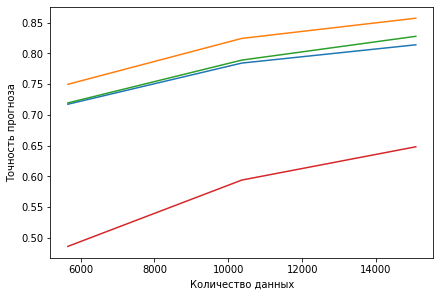

In [127]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


fig, ax = plt.subplots(layout='constrained')
ax.set_xlabel("Количество данных")
ax.set_ylabel("Точность прогноза")
for model, title in zip(models, titles):
    acc_pred = []
    for i in trainsize:
        X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                            train_size=i,
                                                            stratify=y)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    acc_pred.append(metrics.accuracy_score(y_test, y_pred))


    ax.plot(data_size, metrics.accuracy_score(y_test, y_pred), label=title)
ax.legend();

In [16]:
import time
from sklearn.model_selection import train_test_split


for model, title in zip(models, titles):
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        train_size=0.8,
                                                        stratify=y)
    start_time = time.time()
    model.fit(X_train, y_train)
    print("--- %s seconds ---" % (time.time() - start_time))
    # y_pred = model.predict(X_test)

f:\programming\python\daaml\venv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--- 33.515496253967285 seconds ---
--- 257.4875018596649 seconds ---
--- 385.8019983768463 seconds ---
--- 0.011501789093017578 seconds ---
--- 1288.9302377700806 seconds ---


f:\programming\python\daaml\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
